In [1]:
import networkx as nx
import pandas as pd
from networkx.algorithms.community import greedy_modularity_communities
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [10]:
def detect_communities(graph, name):
    print(f"\n--- Community Detection for {name} ---")
    try:
        communities = list(greedy_modularity_communities(graph))
        print(f"Detected {len(communities)} communities.")
        node_to_community = {}
        for i, comm in enumerate(communities):
            for node in comm:
                node_to_community[node] = i
        return node_to_community
    except Exception as e:
        print(f"Community detection failed for {name}: {e}")
        return {}

In [28]:
# === Visualize community structure for all graphs (Top 100 nodes only) ===
def draw_top100_community_graph(graph, community_map, title, file):
    if not community_map:
        return
    top_nodes = sorted(graph.degree, key=lambda x: x[1], reverse=True)[:100]
    subgraph = graph.subgraph([n for n, _ in top_nodes if n in community_map])
    pos = nx.spring_layout(subgraph, seed=42)
    color_map = plt.get_cmap("tab20")
    node_colors = [color_map(community_map[n] % 20) for n in subgraph.nodes]
    plt.figure(figsize=(12, 10))
    nx.draw(subgraph, pos, node_color=node_colors, node_size=45, edge_color='gray', alpha=0.6, with_labels=False)
    plt.title(title)
    plt.axis('off')
    plt.savefig(file, dpi=300)
    plt.show()

In [2]:
G1 = nx.read_gml("graphs/G1_speaker_cooccurrence.gml")

In [12]:
G1_com = detect_communities(G1, "G1 - Speaker Co-occurrence")


--- Community Detection for G1 - Speaker Co-occurrence ---
Detected 5 communities.


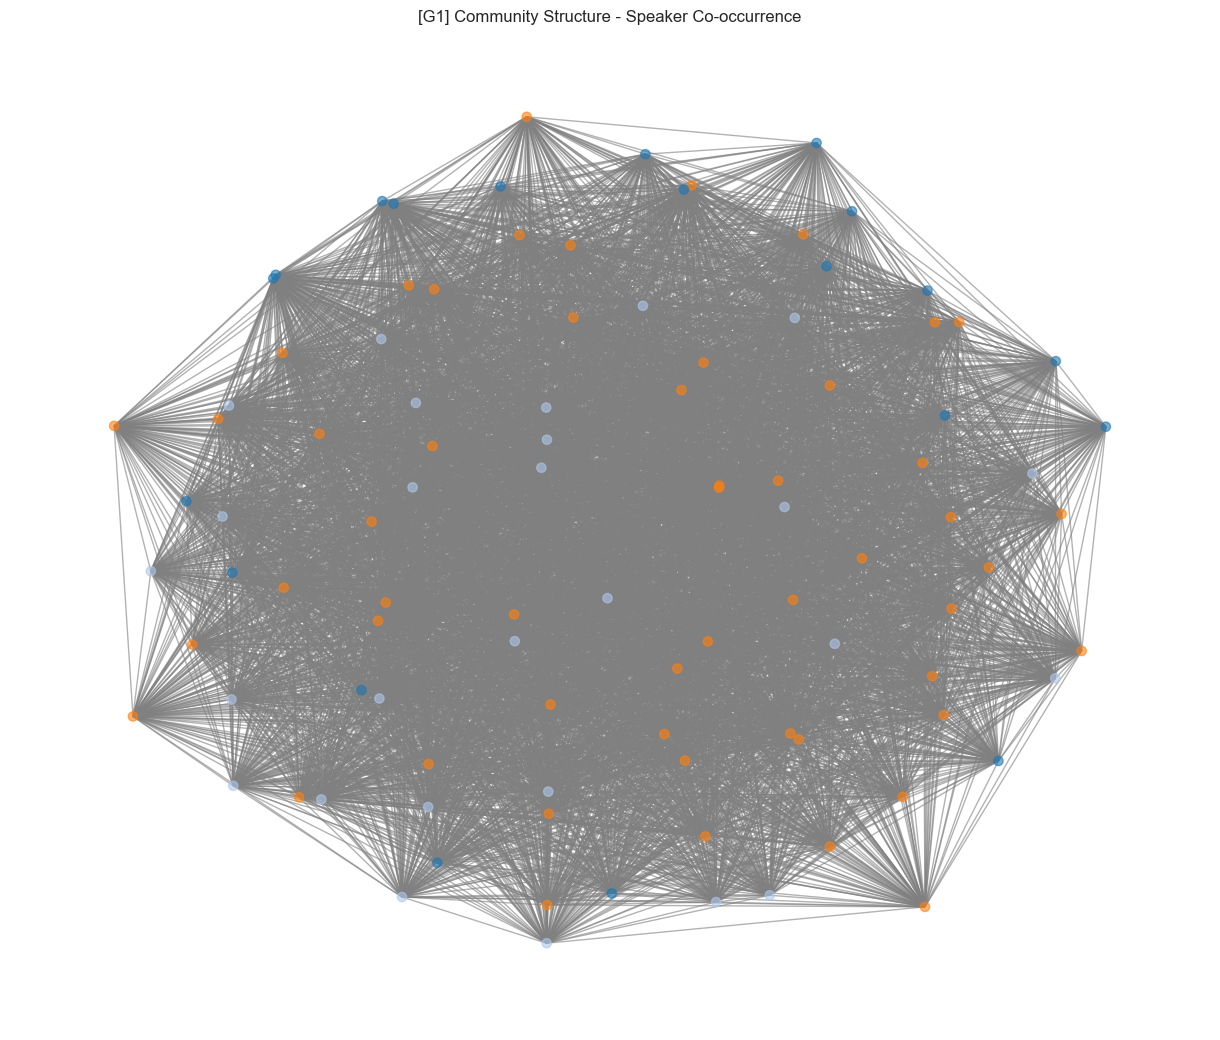

In [13]:
draw_top100_community_graph(G1, G1_com, "[G1] Community Structure - Speaker Co-occurrence", "graphs/G1_community_structure_top100.png")

In [4]:
G2 = nx.read_gml("graphs/G2_speaker_cooccurrence.gml")

In [14]:
G2_com = detect_communities(G2, "G2 - Speaker Co-occurrence By Subject")


--- Community Detection for G2 - Speaker Co-occurrence By Subject ---
Detected 2910 communities.


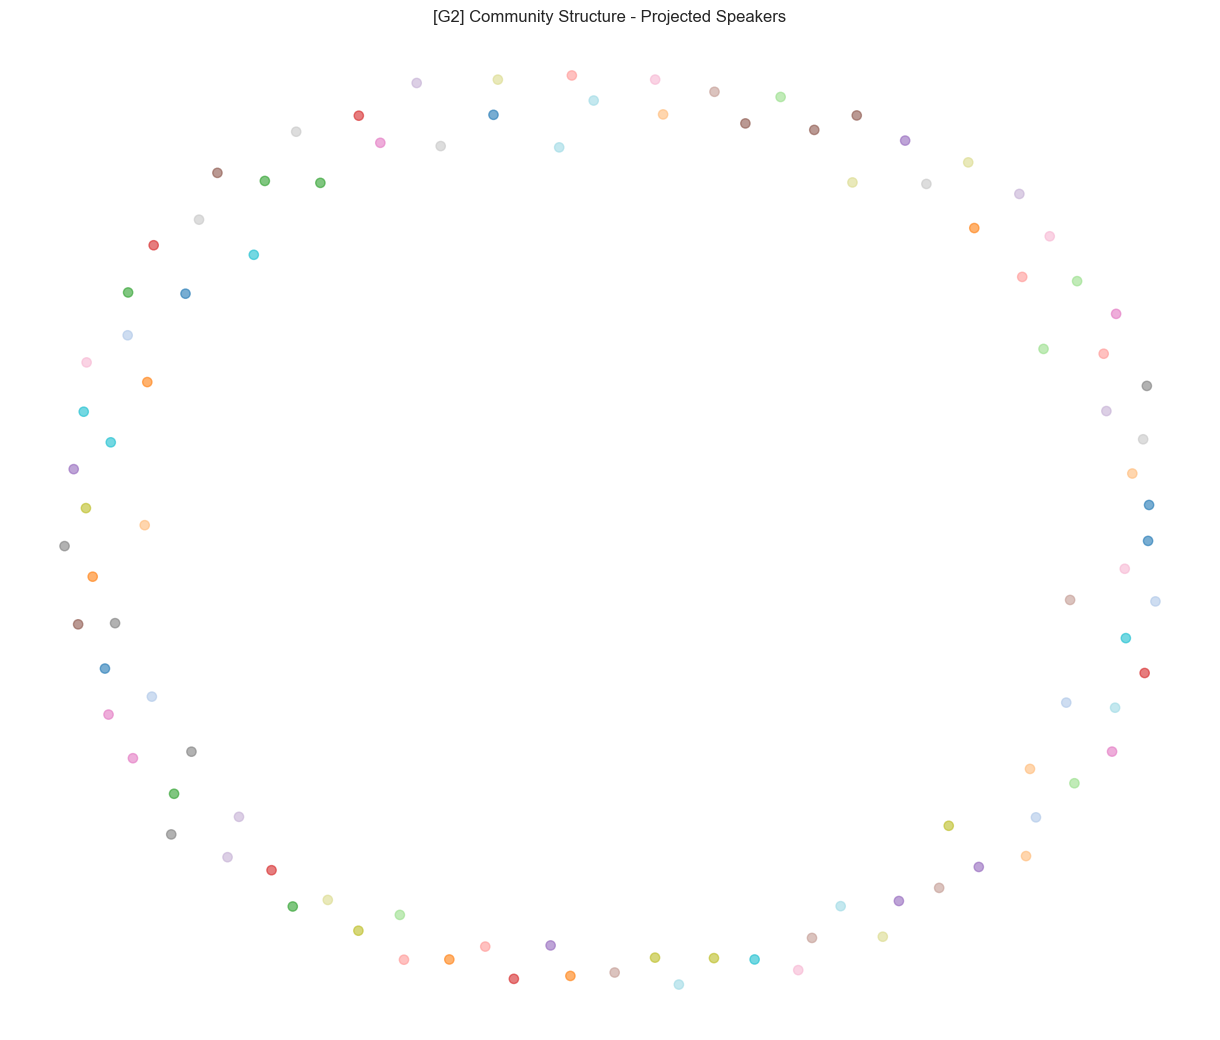

In [15]:
draw_top100_community_graph(G2, G2_com, "[G2] Community Structure - Projected Speakers", "graphs/G2_community_structure_top100.png")

In [7]:
G3 = nx.read_gml("graphs/G3_speaker_party_affiliation.gml")

In [16]:
G3_com = detect_communities(G3, "G3 - Speaker–Party")


--- Community Detection for G3 - Speaker–Party ---
Detected 4 communities.


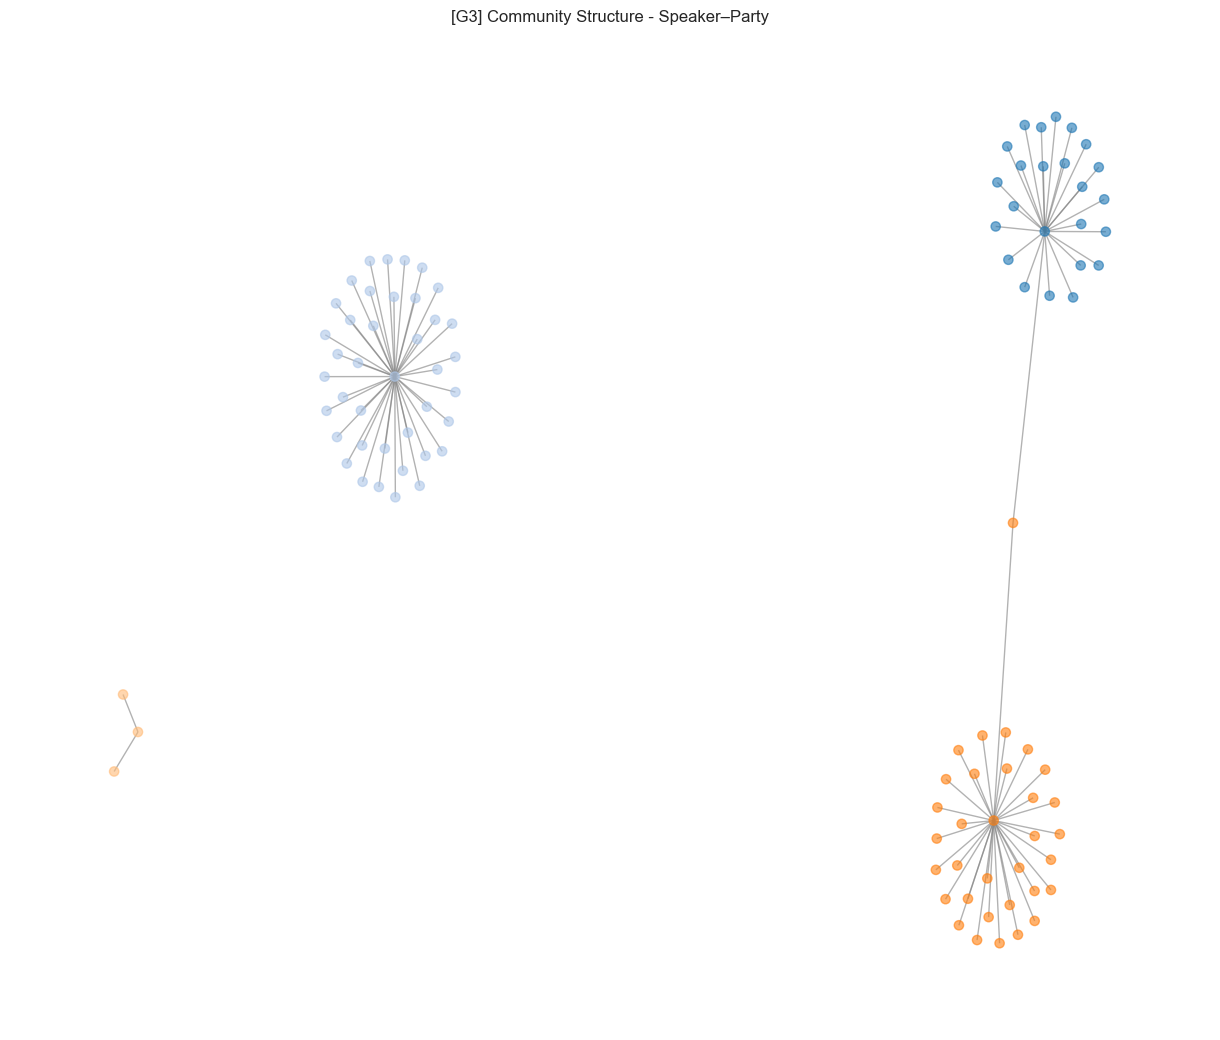

In [17]:
draw_top100_community_graph(G3, G3_com, "[G3] Community Structure - Speaker–Party", "graphs/G3_community_structure_top100.png")

In [6]:
G4 = nx.read_gml("graphs/G4_statement_label_graph.gml")

In [18]:
G4_com = detect_communities(G4, "G4 - Statement–Label")


--- Community Detection for G4 - Statement–Label ---
Detected 6 communities.


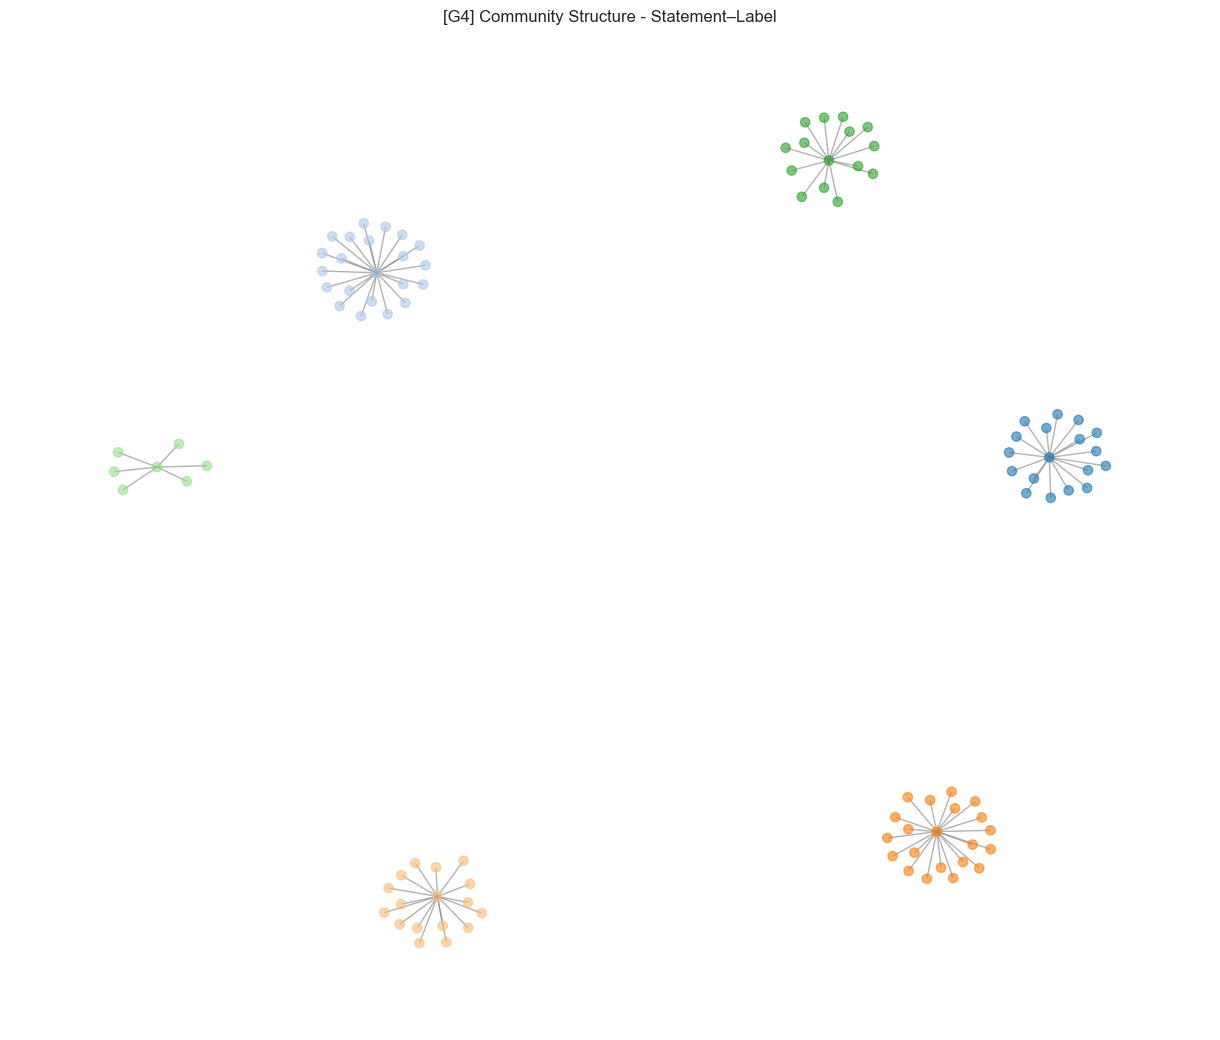

In [19]:
draw_top100_community_graph(G4, G4_com, "[G4] Community Structure - Statement–Label", "graphs/G4_community_structure_top100.png")

In [8]:
G5 = nx.read_gml("graphs/G5_speaker_statement_bipartite.gml")

In [20]:
G5_com = detect_communities(G5, "G5 - Speaker–Statement Bipartite")


--- Community Detection for G5 - Speaker–Statement Bipartite ---
Detected 1833 communities.


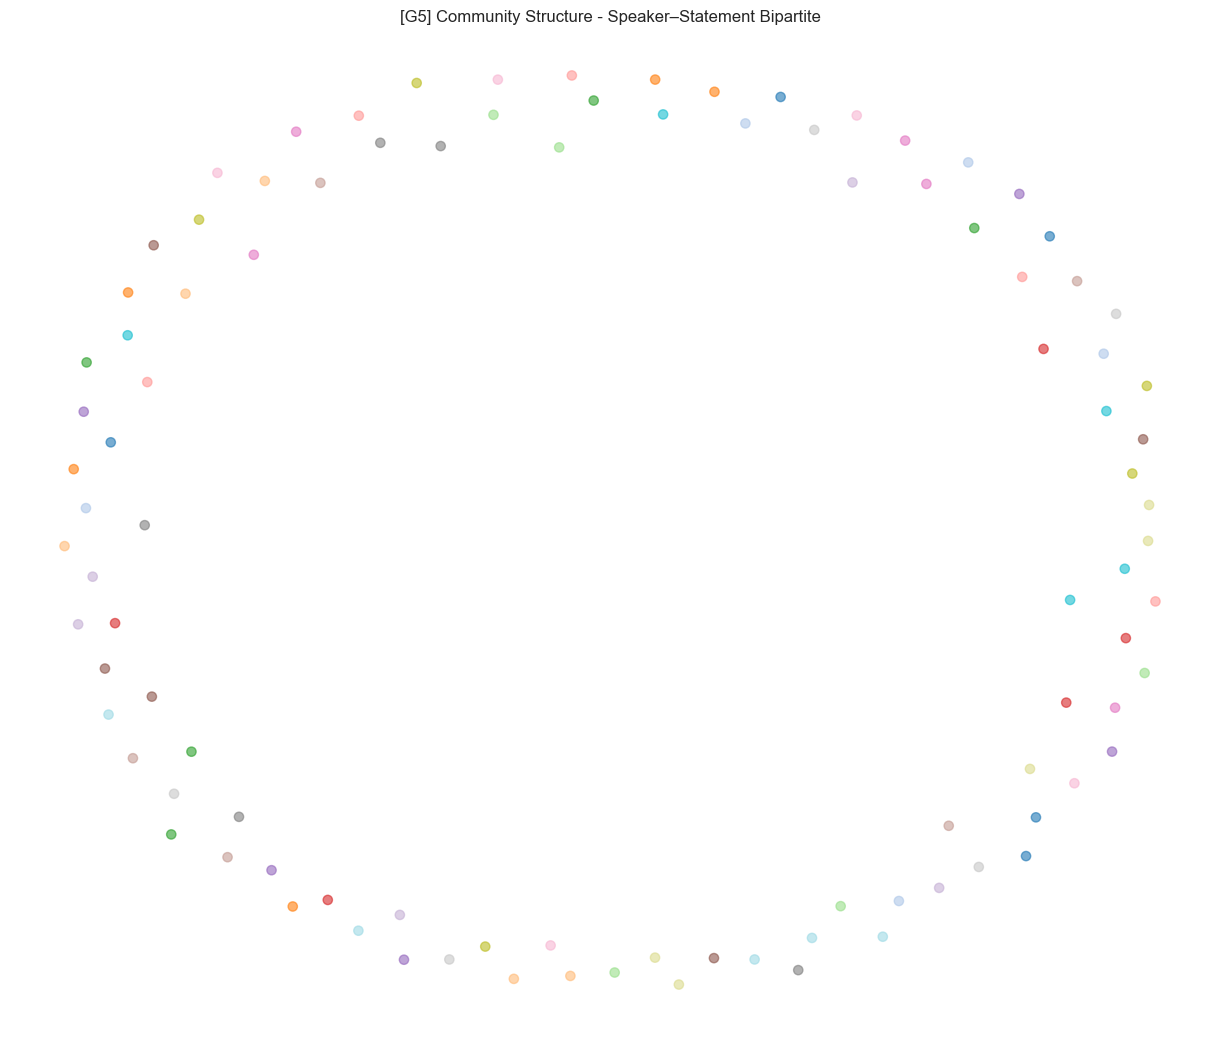

In [21]:
draw_top100_community_graph(G5, G5_com, "[G5] Community Structure - Speaker–Statement Bipartite", "graphs/G5_community_structure_top100.png")

In [23]:
G6 = nx.read_gml("graphs/G6_speaker_party_statement.gml")

In [24]:
G6_com = nx.read_gml("graphs/G6_speaker_party_statement.gml")